In [1]:
import pandas as pd
import numpy as np

import utils as ut
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import svm

from tqdm import tqdm

import seaborn as sns
from sklearn.metrics import confusion_matrix
import sklearn.metrics

from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer

import pickle

from prettytable import PrettyTable
from prettytable import MSWORD_FRIENDLY

import time
#import tensorflow_addons as tfa
inicio = time.time()

In [2]:
split_size = 10

In [3]:
PATH = '../data/water_potability.csv'
label_column='Potability'
have_classes=True
drop_columns_list=['Id']
drop_columns=True
dropna = False

gamma_search = ['scale','auto']
C_search = range(1, 100, 5)
degree_search = range(1, 5, 5)

df, df_one_hot, X, y, classes, columns = ut.clean_data(PATH=PATH, shuffle=True, label_column=label_column, drop_columns_list=drop_columns_list, drop_columns=drop_columns, have_classes=have_classes, dropna=dropna)
df

NaN = **1434** will be categorized under feature_nan columns
NaN = **1434** will be categorized under feature_nan columns


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
939,10.811290,209.103050,11848.228270,10.141060,349.923229,393.186446,15.474876,66.030317,4.416184,0
3200,8.581043,153.709092,19970.434294,7.661687,312.885127,520.808359,14.781584,74.127793,2.883145,1
1944,6.149185,150.563594,20596.391231,6.906911,NaN,431.651283,12.829380,64.394907,4.275615,1
2676,7.413288,196.452302,17465.345582,6.309196,355.164792,300.933492,13.178069,80.604776,3.290106,0
2175,7.274757,195.118030,21496.745136,6.571090,360.697815,418.373582,11.382543,81.235608,4.271581,0
...,...,...,...,...,...,...,...,...,...,...
648,5.171434,207.280531,44612.751358,7.287925,300.254258,552.907590,12.723725,52.237736,2.949432,0
1230,7.943882,211.816551,32071.179369,7.769215,290.337398,353.336484,17.871950,78.492783,4.111691,0
2019,5.985012,151.360967,20155.434469,7.723292,275.079738,478.332360,18.016266,99.061233,3.764100,1
1583,7.736313,225.063103,19496.848592,7.158343,289.945985,433.974022,15.153817,74.765101,3.700917,1


In [4]:
X =  preprocessing.scale(X, with_mean='False')
y = np.array(y)
X = np.array(X)

imputer = KNNImputer()
imputer.fit(X)
X = imputer.transform(X)

In [5]:
from sklearn.metrics import roc_curve
import seaborn as sns

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [6]:
y.shape

(3276,)

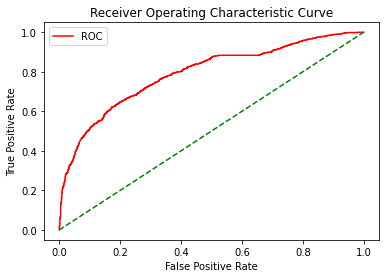

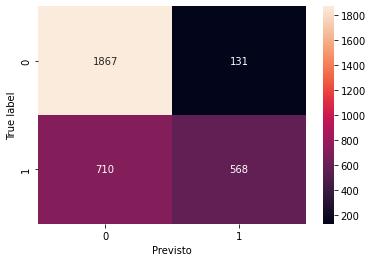

1  

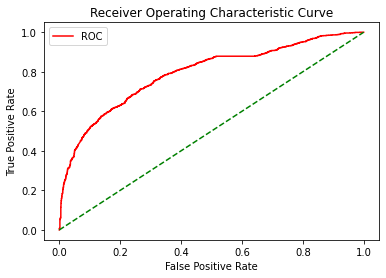

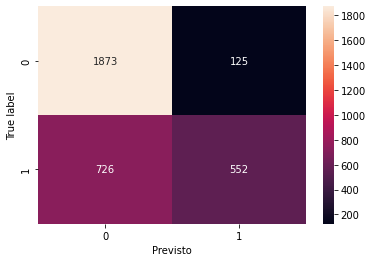

2  

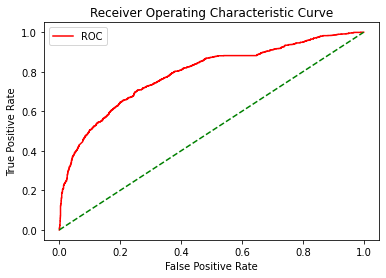

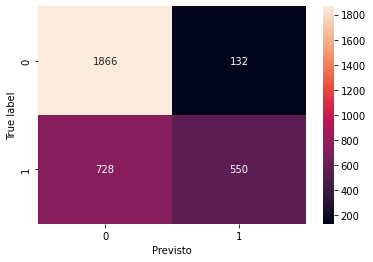

3  

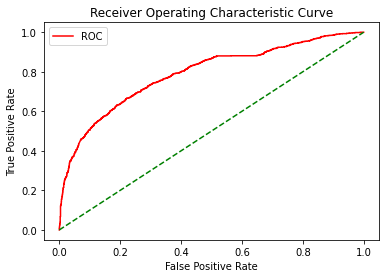

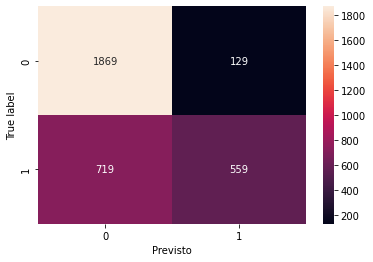

4  

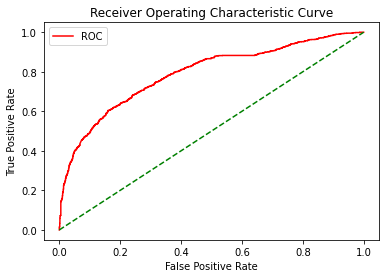

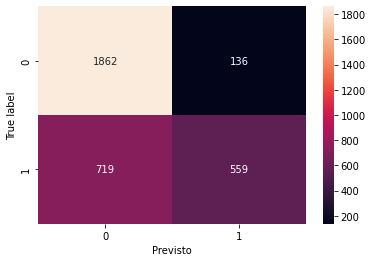

5  

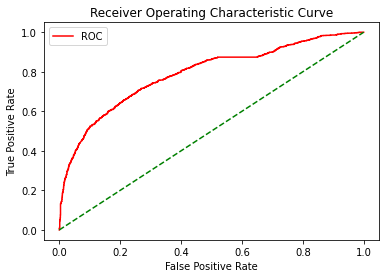

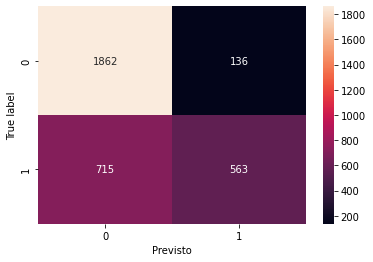

6  

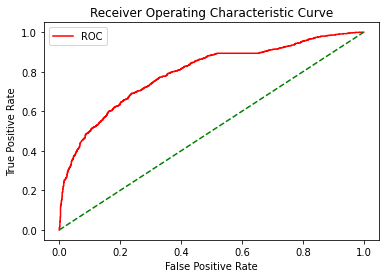

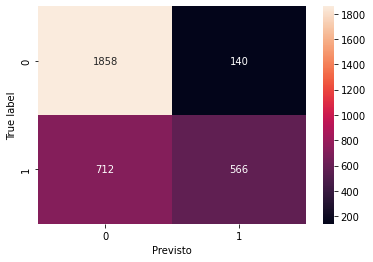

7  

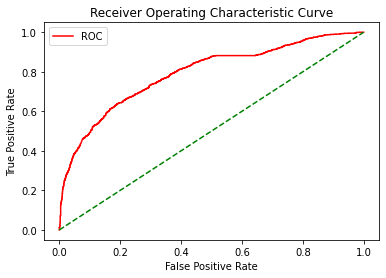

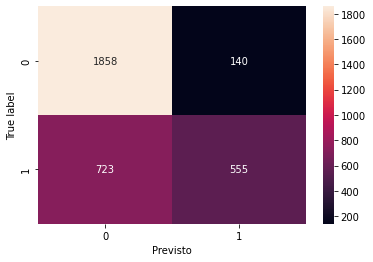

8  

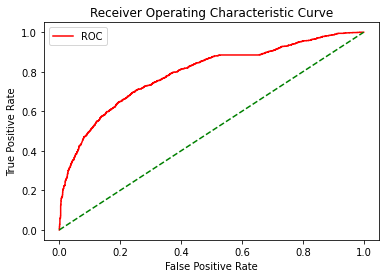

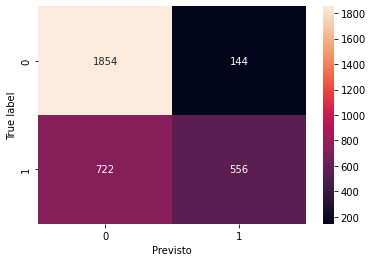

9  

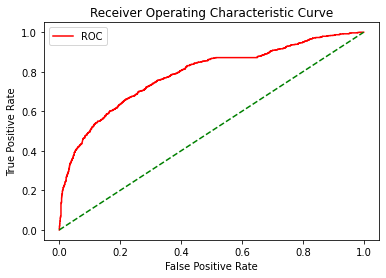

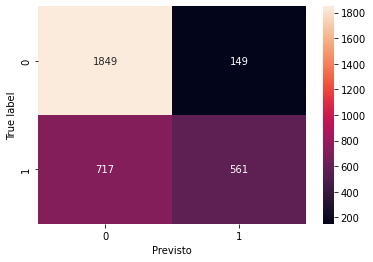

10  

In [7]:
results = []
results.append(['predicoes','predicoes_val','train_acc','train_pre','train_rec','train_f1','val_acc','val_pre','val_rec','val_f1'])

#table = PrettyTable( ['id','train_acc','train_pre','train_rec','train_f1','val_acc','val_pre','val_rec','val_f1'] )
table = PrettyTable( ['K-Fold','train_acc','val_acc',  'train_rec','val_rec',  'train_pre','val_pre',  'train_f1','val_f1'] )
i=0

kf = KFold(n_splits=split_size)


#clf = svm.SVC(C=0.99, gamma='scale', degree=3, kernel='poly', probability=True)
clf = svm.SVC(C=0.99, gamma='scale', degree=3, kernel='rbf', probability=True)


for train_idx, val_idx in  kf.split(X, y) :

    train_x = X[train_idx]
    train_y = y[train_idx]
    val_x = X[val_idx]
    val_y = y[val_idx]

    clf.fit(train_x, train_y)
    

    predicoes_train = clf.predict(train_x)
    
    #print(f'xablau - {predicoes_train}')
    
    #for i in range(len(predicoes_train)):
    #    print(f'--{predicoes_train[i]}')
    
    #predicoes_train = predicoes_train > 0.5
    
    acc = sklearn.metrics.accuracy_score(y_true = train_y , y_pred = predicoes_train)
    pre = sklearn.metrics.precision_score(y_true = train_y, y_pred = predicoes_train, zero_division=0)
    rec = sklearn.metrics.recall_score(y_true = train_y   , y_pred = predicoes_train)
    f1 = sklearn.metrics.f1_score(y_true = train_y        , y_pred = predicoes_train)

    predicoes_val = clf.predict(val_x)
    
    #predicoes_val = predicoes_train > 0.5
    
    val_acc = sklearn.metrics.accuracy_score(y_true = val_y,  y_pred = predicoes_val)
    val_pre = sklearn.metrics.precision_score(y_true = val_y, y_pred = predicoes_val, zero_division=0)
    val_rec = sklearn.metrics.recall_score(y_true = val_y,    y_pred = predicoes_val)
    val_f1 = sklearn.metrics.f1_score(y_true = val_y,         y_pred = predicoes_val)
    
    i+=1
    table.add_row( [i,   acc, val_acc,     rec, val_rec,    pre, val_pre,     f1, val_f1] )

    results.append([ predicoes_train, predicoes_val, acc, pre, rec, f1, val_acc, val_pre, val_rec, val_f1])
    
    
    proba = clf.predict_proba(X) 
    proba = proba[:, 1]

    fper, tper, thresholds = roc_curve(y_true=y, y_score=proba)
    plot_roc_curve(fper, tper)

    
    
    
    proba = proba > 0.5
    confusion_mtx = confusion_matrix(y, proba)
    #plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx, xticklabels=['0','1'], yticklabels=['0','1'], annot=True, fmt='g')
    plt.xlabel('Previsto')
    plt.ylabel('True label')
    plt.show() 
    
    
    
    print(f'{i}  ',end='')

In [8]:
print(table)

+--------+--------------------+--------------------+---------------------+---------------------+--------------------+--------------------+--------------------+---------------------+
| K-Fold |     train_acc      |      val_acc       |      train_rec      |       val_rec       |     train_pre      |      val_pre       |      train_f1      |        val_f1       |
+--------+--------------------+--------------------+---------------------+---------------------+--------------------+--------------------+--------------------+---------------------+
|   1    | 0.7218453188602443 | 0.7164634146341463 |  0.3567708333333333 |  0.373015873015873  | 0.8387755102040816 | 0.7704918032786885 | 0.5006090133982948 |  0.5026737967914439 |
|   2    | 0.7310040705563093 | 0.6554878048780488 |  0.3605263157894737 |  0.3115942028985507 | 0.8652631578947368 | 0.7049180327868853 | 0.5089783281733746 | 0.43216080402010054 |
|   3    | 0.7310040705563093 | 0.6829268292682927 | 0.37294015611448394 |        0.296   